In [2]:
!git clone https://github.com/joaolague/data_mlcourse.git

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/data_mlcourse')

from plotting_gv import *

In [3]:
path = '/content/drive/MyDrive/GVLA_SHARED FOLDER/02_TRAINING/01_TRAINING_MATERIALS/01_MACHINE_LEARNING/01_SCRIPTS/ML_Práticas_140222/phosphate_assay_sampled_geomet_clustered.csv'


data = pd.read_csv(path)

#data.head(5)
data.columns

Index(['Name', 'X', 'Y', 'Z', 'Depth From', 'Depth To', 'Length', 'AL2O3',
       'ALT', 'BAO', 'CAO', 'Consumo_coletor_(g/t)', 'FE2O3', 'MASSA_T', 'MGO',
       'NB2O5', 'P2O5', 'SIO2', 'TIO2', 'kmeans_5k', 'aggl_5k', 'kmeans_2k',
       'aggl_2k', 'kmeans_3k', 'aggl_3k', 'kmeans_4k', 'aggl_4k', 'kmeans_6k',
       'aggl_6k'],
      dtype='object')

In [4]:
data0 = data.dropna()

In [5]:
coords = ['X', 'Y', 'Z']

cat_var = ['ALT']

variables =  ['AL2O3', 'BAO', 'CAO', 'FE2O3', 'MGO', 'NB2O5', 'P2O5', 'SIO2', 'TIO2']

clusters = ['aggl_5k','kmeans_3k', 'aggl_3k', 'kmeans_4k', 'aggl_4k', 'kmeans_5k', 'kmeans_2k', 'aggl_2k', 'kmeans_6k', 'aggl_6k']

In [5]:
target = 'kmeans_5k'

In [6]:
X = data0[variables].values #declarando as variáveis ou features
y = data0[target].values # declarando qual será a classe alvo do modelo

In [6]:
data['kmeans_5k'].value_counts()

0.0    1147
4.0     957
3.0     710
1.0     597
2.0     184
Name: kmeans_5k, dtype: int64

In [8]:
len(X)

3595

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, # X features, independent variables
    y, # y target, dependet variable
    test_size=0.3, #fração de treino e teste
    shuffle=True, #embaralha os dados: evita que a divisão dos dados fique tendenciosa a uma classe "pra nao ficar na mesma ordem"
    random_state=100, #semente aleatória: garante a repoducibilidade dos resultados, ou seja, a divisão dos dados será sempre a mesma
    stratify=y) #separa treino e teste com a mesma proporção ## muito bom, explicar!


In [10]:
print('Fração de treino:')
len(X_train)

Fração de treino:


2516

In [11]:
print('Fração de validação:')
len(X_test)

Fração de validação:


1079

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# só precisamos transformar o X, ou seja, as features onde serão treinados e validados os modelos
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## KNN Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [13]:
from sklearn.neighbors import KNeighborsClassifier    

In [14]:
nn = 50 #número de vizinhos


knn = KNeighborsClassifier(
    n_neighbors=nn, #numero de vizinhos a ser considerados
    weights='distance', #como ele vai ponderar a proximidade das amostras (pesos), nesse caso distancia euclidiana
    p=2 #p=2 usa a distância euclidiana, weights é como ele calcula os pesos para os vizinhos
    ) 

knn.fit(X_train, y_train) #aplicando o modelo nos dados de treino

y_pred = knn.predict(X_test) #prevendo os valores a partir do modelo nos dados de teste



              precision    recall  f1-score   support

         0.0       1.00      0.34      0.51        50
         1.0       0.97      0.98      0.97       339
         2.0       0.93      0.99      0.96       220
         3.0       0.96      0.99      0.98       289
         4.0       0.90      0.94      0.92       181

    accuracy                           0.95      1079
   macro avg       0.95      0.85      0.87      1079
weighted avg       0.95      0.95      0.94      1079



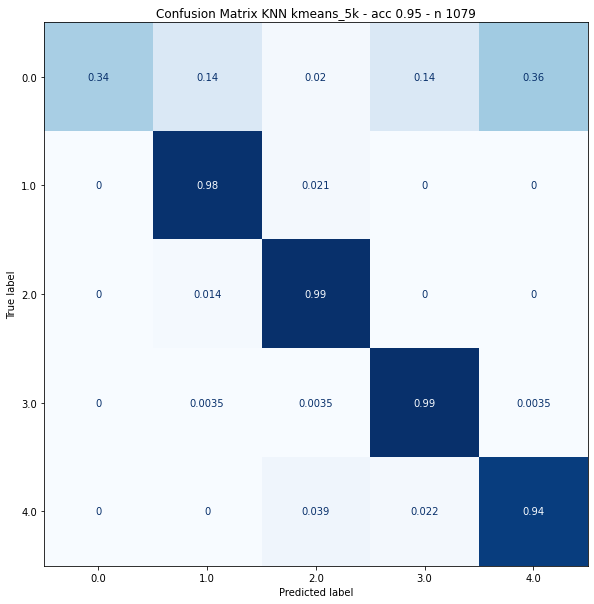

In [15]:
confusion_matrix_plot(knn, y_test, y_pred, f'Confusion Matrix KNN {target}', report=True )

## SVM

https://scikit-learn.org/stable/modules/svm.html

## Linear and RBF SVC: support vector classification

In [16]:
from sklearn.svm import SVC

In [17]:
svm = SVC(
kernel='linear', #kernel a ser usado para a construção dos hiperplanos..
C=1, #penaliza os pontos que estão do lado errado do hiperplano, quanto maior C mais pontos sao penalizados, ou mais rigoroso.
#gamma='scale', #habilitar se o kernel for rbf!
class_weight='balanced', # calcula automaticamente os balanços entre as classes (pode passar manualmente em dicionário)
random_state=100, #reproducibilidade dos resultados
probability=True) #retorna as probabilidades de cada classe

svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        50
         1.0       1.00      0.96      0.98       339
         2.0       0.94      1.00      0.97       220
         3.0       0.99      0.99      0.99       289
         4.0       1.00      0.95      0.97       181

    accuracy                           0.98      1079
   macro avg       0.96      0.98      0.97      1079
weighted avg       0.98      0.98      0.98      1079



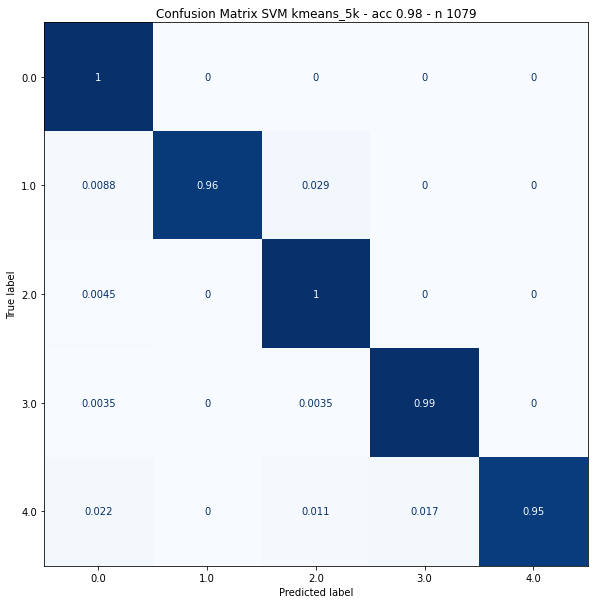

In [18]:
confusion_matrix_plot(svm, y_test, y_pred, f'Confusion Matrix SVM {target}', report=True)

## Decision Trees

https://scikit-learn.org/stable/modules/tree.html

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree = DecisionTreeClassifier(
random_state=100,
criterion='gini',
max_depth=8,
min_samples_split=100
)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        50
         1.0       0.95      0.92      0.94       339
         2.0       0.87      0.88      0.88       220
         3.0       0.97      0.98      0.97       289
         4.0       0.88      0.95      0.91       181

    accuracy                           0.92      1079
   macro avg       0.90      0.88      0.89      1079
weighted avg       0.92      0.92      0.92      1079



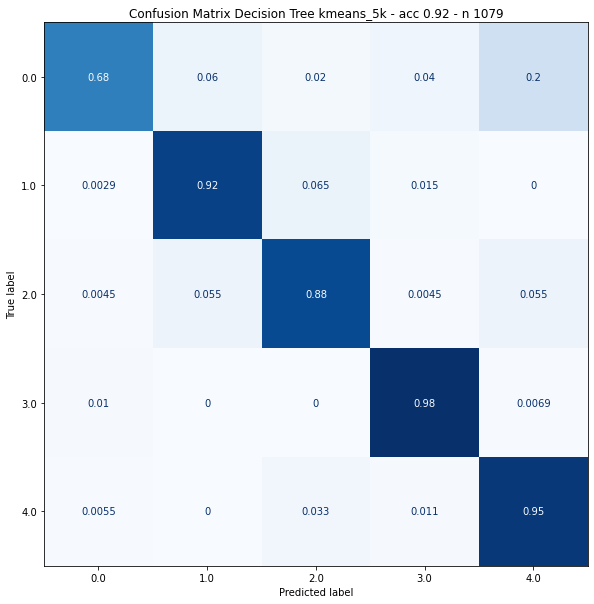

In [21]:
confusion_matrix_plot(tree, y_test, y_pred, f'Confusion Matrix Decision Tree {target}', report=True )


## Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(
n_estimators=300,
max_depth=8,
min_samples_split=5,
random_state=100,
)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84        50
         1.0       0.98      0.98      0.98       339
         2.0       0.94      0.97      0.96       220
         3.0       0.98      0.99      0.99       289
         4.0       0.96      0.95      0.95       181

    accuracy                           0.97      1079
   macro avg       0.96      0.93      0.94      1079
weighted avg       0.97      0.97      0.97      1079



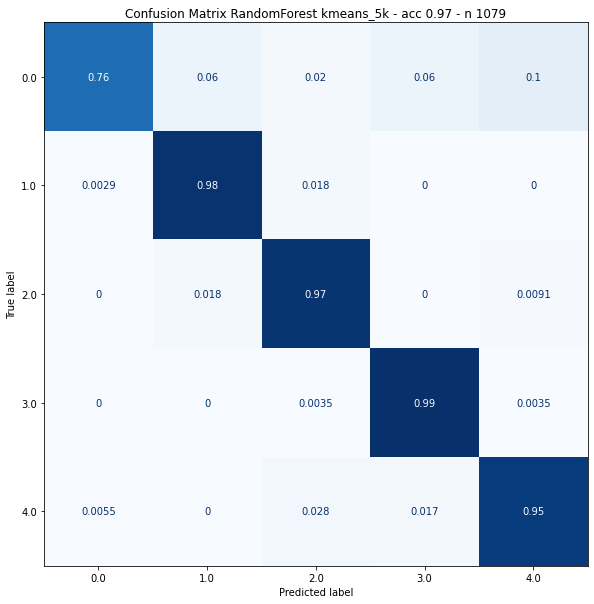

In [24]:
confusion_matrix_plot(rf, y_test, y_pred, f'Confusion Matrix RandomForest {target}', report=True )


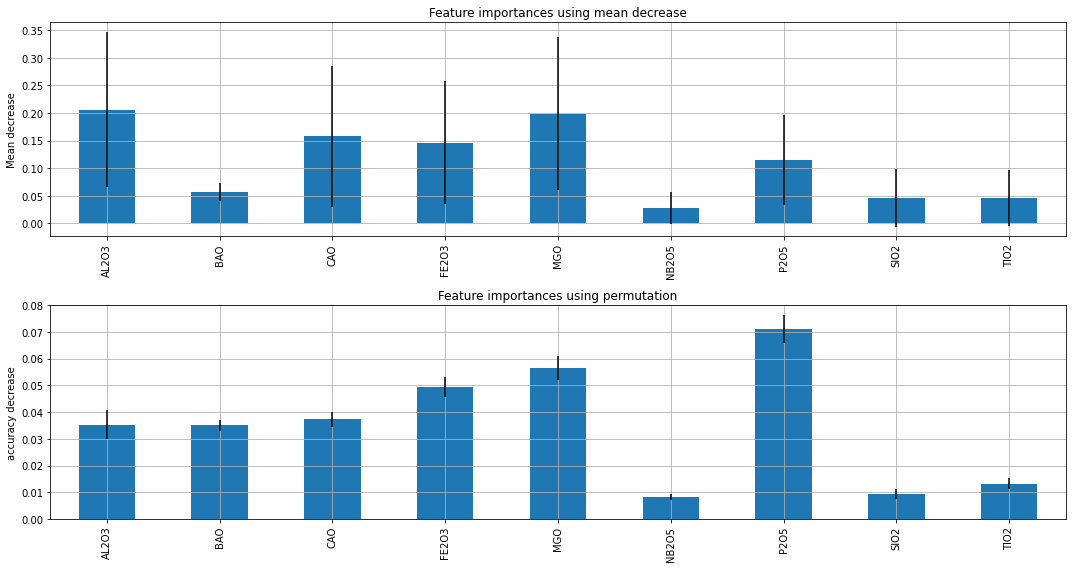

In [25]:
features_importance(rf, X_test, variables, y_test, clf=True)

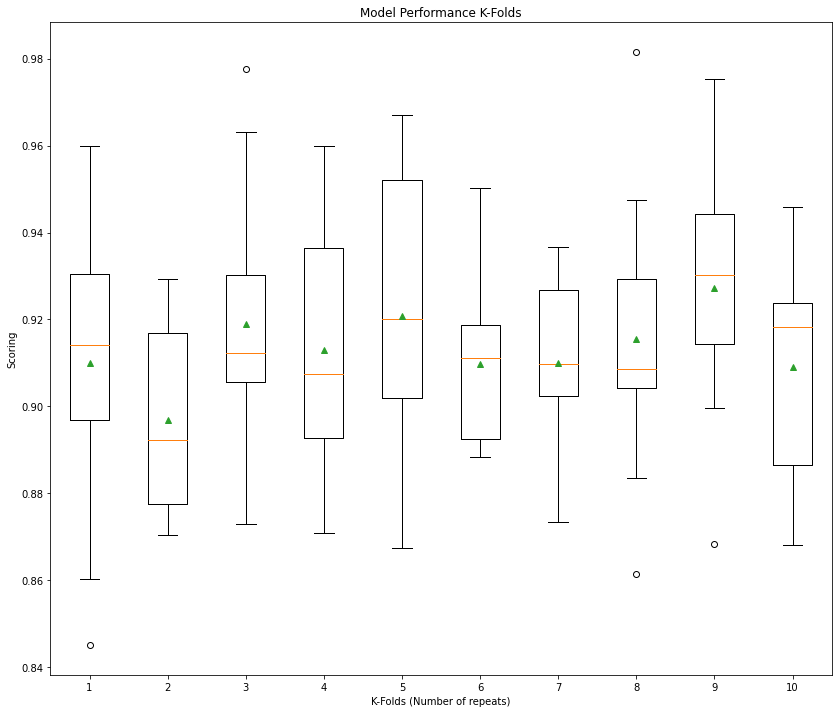

In [26]:
evaluate_kfolds(X_train, y_train, 10, 5, rf)